# AnyoneAI - Project I

# An analysis of NBA players in the 2021/2022 season

Hi! this is the first of several projects we're going to be working on during this course. 
You will be expected to finish this on your own, but you can use the available channels on Discord to ask questions and help others. Please read the entire notebook before starting, this will give you a better idea of what you need to accomplish.

This project will rely heavily in the use of API as data sources. Contrary to most machine learning challenges and competitions, working in the industry usually requires the ML Developer to work with multiple teams and use heterogeneous sources of information to get the necessary data to solve a particular problem. Access to data is often provided through application programming interfaces (APIs), whether internal or external to the organization. It is very important to understand how to interact with APIs to collect data in our day to day work.

You might be wondering: why basketball? The main reason is availability of data.

The sport is played at a fast pace, with hundreds of plays in each single game, thousands of games in a season, and with a relatively small amount of on-court players, which gives them a lot of interactions with the ball, which in turn provides an oportunity to collect a great amount of data about each player performance.

These are the objectives of the project:
- Understanding how to query an API to create a dataset with Python and Pandas
- Learning how to cleanup a dataset and generate new fields from calculated data
- Storing the created dataset in a serialized manner
- Generating statistics about the data
- Visualizing data

## Introduction

### A brief description of basketball and the NBA

The National Basketball Association is the main basketball league in the United States of America. It currently features 30 teams from different cities, divided in 2 conferences (East and West) of 15 teams. Each team plays a total of 82 games during the regular season. After that, the 8 teams with better records from each conference are seeded in a playoff format, with the winner of each conference playing the finals to determine the eventual champion. NBA seasons usually play out between october of one year, to june of the next year, so for example the current season being played is called the 2021/2022 season.

As in most leagues in the world, the game is played 5 vs 5 players, with as many as 9 reserve players that can rotate with the starters as many times as the team wants. Games are played to 48 minutes, so the total amount of minutes of combined play time for any team in a single game with no added time is 240 minutes. If the score is tied at the end of the 48 minutes, 5 minutes of extra time are played, this continues until a winner is decided.

Even though they can play multiple positions, players are usually classified according to the following positions:

- Guards
    - Point Guards
    - Shooting Guards
- Forwards
    - Small Forwards
    - Power Forwards
- Centers

We will mainly focus on the three main positions: Guards/Forwards/Centers

### The dataset

You'll be in charge of creating our dataset. We want to create a single pandas dataframe with information about all active players in the current NBA season. 
The dataset needs to have the following structure:

- Personal Information
    - player_id (int) (INDEX) 
    - player_name (str)
    - team_name (str)
    - position (str)
    - height (int) (in centimeters) 
    - weight (float) (in kilograms)
    - country of origin (str)
    - date_of_birth (datetime)
    - age (str) (years and months)
    - years_of_experience (int) (years since entering the league)
    - Draft position (int)
- Player career statistics
    - games played (int)
    - minutes per game (float)
    - points per game (float)
    - rebounds per game (float)
    - assists per game (float)
    - steals per game (float)
    - blocks per game (float)
- Misc
    - salary in dollars (int) (contract value for this season only)
    - next_game_date (datetime)

Here is a sample of how the final result should look like:

In [11]:
import pandas as pd

sample_dict = {
    'PLAYER_NAME': {200765: 'Rajon Rondo',  203107: 'Tomas Satoransky',  204060: 'Joe Ingles'},
    'TEAM_NAME': {200765: 'Cavaliers', 203107: 'Wizards', 204060: 'Trail Blazers'},
    'POSITION': {200765: 'Guard', 203107: 'Guard', 204060: 'Forward'},
    'HEIGHT': {200765: 185, 203107: 201, 204060: 203},
    'WEIGHT': {200765: 82, 203107: 95, 204060: 100},
    'COUNTRY': {200765: 'USA', 203107: 'Czech Republic', 204060: 'Australia'},
    'BIRTHDATE': {200765: pd.Timestamp('1986-02-22 00:00:00'), 203107: pd.Timestamp('1991-10-30 00:00:00'), 204060: pd.Timestamp('1987-10-02 00:00:00')},
    'SEASON_EXP': {200765: 15, 203107: 5, 204060: 7},
    'DRAFT_NUMBER': {200765: '21', 203107: '32', 204060: 'Undrafted'},
    'GP': {200765: 957, 203107: 388, 204060: 590},
    'MIN': {200765: 29.9, 203107: 22.2, 204060: 25.7},
    'PTS': {200765: 9.8, 203107: 6.9, 204060: 8.6},
    'REB': {200765: 4.5, 203107: 2.9, 204060: 3.2},
    'AST': {200765: 7.9, 203107: 4.1, 204060: 3.8},
    'STL': {200765: 1.6, 203107: 0.8, 204060: 0.9},
    'BLK': {200765: 0.1, 203107: 0.2, 204060: 0.2},
    'GAME_DATE': {200765: pd.Timestamp('2022-04-10 00:00:00'), 203107: pd.Timestamp('2022-04-10 00:00:00'), 204060: pd.Timestamp('2022-04-10 00:00:00')},
    'SALARY': {200765: 2641691, 203107: 10468119, 204060: 14000000},
    'AGE': {200765: '36 years, 1 months, 19 days', 203107: '30 years, 5 months, 11 days', 204060: '34 years, 6 months, 8 days'}
}
pd.DataFrame(sample_dict)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
200765,Rajon Rondo,Cavaliers,Guard,185,82,USA,1986-02-22,15,21,957,29.9,9.8,4.5,7.9,1.6,0.1,2022-04-10,2641691,"36 years, 1 months, 19 days"
203107,Tomas Satoransky,Wizards,Guard,201,95,Czech Republic,1991-10-30,5,32,388,22.2,6.9,2.9,4.1,0.8,0.2,2022-04-10,10468119,"30 years, 5 months, 11 days"
204060,Joe Ingles,Trail Blazers,Forward,203,100,Australia,1987-10-02,7,Undrafted,590,25.7,8.6,3.2,3.8,0.9,0.2,2022-04-10,14000000,"34 years, 6 months, 8 days"


## Collecting information for building our dataset

In this section, we're only going to work on collecting the necessary raw data to build the required dataset. Don't worry about finishing everything here, we'll generate the appropiate fields and merge the data into a single dataframe in the next section.

To get the information, you can use any public and free API you can find, but you have to provide the code that gets the information here. We recommend using this API:
 
- https://github.com/swar/nba_api

    This is a Python library that can be used to obtain data from stats.nba.com, it provides a set of methods that abstracts you from making the http calls, but directly makes calls to nba stats page and parses the results. [Here](https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb) are a couple of examples on how to use it.
    

A few notes on data collection:

- Start simple. Try to get all the required information for 1 player, read the APIs documentation carefuly, then think about how to use them to collect all players data. 

- Please bear in mind that the most public APIs have some kind of rate limit, so you have to be careful about iterating on data and making lots of requests in a short amount of time (a 1 second delay between calls to the api should be enough). Once you've collected what you needed, save it to file in order to retrieve it later without calling the API again.

- A key consideration: we only want data about players that have played in the current season, so make sure to filter those out before collecting the rest of the information.

- There is at least one piece of information you're not going to find in both of those APIs: the player contract information. Again you can decide to use any source, but we recommend using information provided [here](https://www.basketball-reference.com/contracts/players.html), as it lets you export the data as a csv.  

1- Create a function to find all ACTIVE players, meaning players that are listed with a team in the 2021/2022 season. For now you only need the player id, name, and team. Save the dataframe to a csv named "nba_current_players_list.csv". The function should return the dataframe.

Hint: you should find an API method that can give you a list of players in just one call, this way we can filter those players we're interested in, and later will make calls for each specific player.

Consider dropping: 
- All players with TEAM_ID == 0
- All players with GAMES_PLAYED_FLAG == N
- Player with id 1630597 (This guy is a problem ;))

In [12]:
# Libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

!pip install nba_api
!pip install unidecode
!pip install matplotlib seaborn

from unidecode import unidecode
from datetime import date
from datetime import datetime
from dateutil.relativedelta import relativedelta
from tqdm.notebook import tqdm

# NBA API endpoints
from nba_api.stats.endpoints import commonallplayers
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import playerprofilev2

# Proxy servers
ps = ['63.161.104.189:3128', '213.136.101.36:3128', '5.39.189.39:3128']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  

Mounted at /content/drive


In [ ]:
### Complete in this cell: get all active players from the api
''' 
API: https://github.com/swar/nba_api/blob/master/docs/nba_api/stats/library/parameters.md#IsOnlyCurrentSeason
1) In this section the function get and save players list is created. Whitin this function I completed the task.
First step, after a compleate reading of the API and its basics, API, its endpoint and the data set is called only with 2021-22 info
Following step, my data frame of players is created
Then 3 masks are applied in order to adquere a list of players as required.
Additionaly, I decided showing only the columns I'll need in the future as a way of simplifying the output
2) My funtion is called as my dataframe current_players_list and saved as CSV in google drive
3) As the API has particular delays, I decided to keep working by reading my CSV file from google drive
In this file, PERSON_ID column is reseted as index and change of columns names is done.

''' 

" \nAPI: https://github.com/swar/nba_api/blob/master/docs/nba_api/stats/library/parameters.md#IsOnlyCurrentSeason\n1) In this section the function get and save players list is created. Whitin this function I completed the task.\nFirst step, after a compleate reading of the API and its basics, API, its endpoint and the data set is called only with 2021-22 info\nFollowing step, my data frame of players is created\nThen 3 masks are applied in order to adquere a list of players as required.\nAdditionaly, I decided showing only the columns I'll need in the future as a way of simplifying the output\n2) My funtion is called as my dataframe current_players_list and saved as CSV in google drive\n3) As the API has particular delays, I decided to keep working by reading my CSV file from google drive\nIn this file, PERSON_ID column is reseted as index and change of columns names is done.\n\n"

In [ ]:
def get_and_save_players_list():
    current_players_list = commonallplayers.CommonAllPlayers(proxy='63.161.104.189:3128',season='2021-22')  
    current_players_list = current_players_list.get_data_frames()[0]                                            
    current_players_list = current_players_list[(current_players_list["TEAM_ID"] != 0) & (current_players_list["GAMES_PLAYED_FLAG"] != "N") & (current_players_list["PERSON_ID"] != 1630597)] 
    
    time.sleep(0.5)
    return(current_players_list [["PERSON_ID", "DISPLAY_FIRST_LAST", "TEAM_NAME"]])

In [ ]:
current_players_list = get_and_save_players_list()
current_players_list.to_csv('/content/drive/MyDrive/Colab Notebooks/01 - Sprint/final/nba_current_players_list.csv', index=False) 

ConnectTimeout: ignored

In [ ]:
current_players_list = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/01 - Sprint/final/nba_current_players_list.csv') 
current_players_list.set_index("PERSON_ID", inplace=True) 
current_players_list.rename(columns={'DISPLAY_FIRST_LAST':'PLAYER_NAME'},inplace=True) 
current_players_list 

,PLAYER_NAME,TEAM_NAME
PERSON_ID,,
1630173,Precious Achiuwa,Raptors
203500,Steven Adams,Grizzlies
1628389,Bam Adebayo,Heat
1630583,Santi Aldama,Grizzlies
200746,LaMarcus Aldridge,Nets
...,...,...
1628221,Gabe York,Pacers
201152,Thaddeus Young,Raptors
1629027,Trae Young,Hawks


2- Create a function to find the personal information of all players listed in the dataframe created in the previous step, and save it to a csv file named "nba_players_personal_info.csv". The function should also return the created dataframe.

OPTIONAL: iterating on a list of players and making API calls can be complex and full of errors, try a code block that handles exceptions (for example a timeout from the API) and returns the partial result before it failed, you could also save the partial information to disk.

In [ ]:
### Complete in this cell: Find players personal information (name, age, dob, etc), store the information in a CSV file.
'''
In this section I've created a new data frame called players personal info
Then called the API and the endpoint of common players info and its data set
As API was running low proxy code was applied and also the timeout time was setted
Following step, with a for loop I itereted regarding each ID player number so as to
concatenate my new and empy dataframe with the information served in API's data set
When this iteration was done, I returned my full of info DF but only with the columns that matters to me.
As done previously, I saved an CSV file in my google drive, reset my index with ID
and read directly from CSV to avoid calling the API each time I reviewed this code.
Please mind, as API has not been called again from this task on, there are only 503 players
which is different from task 1 that brings a total of 504 players
'''   

"\nIn this section I've created a new data frame called players personal info\nThen called the API and the endpoint of common players info and its data set\nAs API was running low proxy code was applied and also the timeout time was setted\nFollowing step, with a for loop I itereted regarding each ID player number so as to\nconcatenate my new and empy dataframe with the information served in API's data set\nWhen this iteration was done, I returned my full of info DF but only with the columns that matters to me.\nAs done previously, I saved an CSV file in my google drive, reset my index with ID\nand read directly from CSV to avoid calling the API each time I reviewed this code.\nPlease mind, as API has not been called again from this task on, there are only 503 players\nwhich is different from task 1 that brings a total of 504 players\n"

In [ ]:
def get_players_personal_information(current_players_list):
  players_personal_info=pd.DataFrame()

  for id in current_players_list.index:
      data_players = commonplayerinfo.CommonPlayerInfo(player_id = id, proxy='63.161.104.189:3128',timeout=60)
      data_players = data_players.get_data_frames()[0]
      players_personal_info = pd.concat([players_personal_info, data_players])
      time.sleep(0.5)
  return players_personal_info[["PERSON_ID", "DISPLAY_FIRST_LAST", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"]]

In [ ]:
players_personal_info = get_players_personal_information(current_players_list)
players_personal_info.to_csv('/content/drive/MyDrive/Colab Notebooks/01 - Sprint/final/nba_players_personal_info.csv',index=False)

In [ ]:
players_personal_info = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/01 - Sprint/final//nba_players_personal_info.csv')
players_personal_info.set_index("PERSON_ID", inplace=True)
players_personal_info.rename(columns={'DISPLAY_FIRST_LAST':'PLAYER_NAME'},inplace=True)
players_personal_info

3- Create a function to find players career statistics, store the information in a CSV file called "nba_players_career_stats.csv"

In [ ]:
### Complete in this cell: find players career stats, save to csv file
'''
In this section I've created a new data frame called players carreer stats
Then called the API and the endpoint of players carreer stats and its data set
As previous task, proxy code was applied and also the timeout time was setted
Idem task 2, with a for loop I itereted each player with theis statistic info regarding each ID player number
so as to concatenate my new and empy dataframe with the information served in API's data set
Players carreer stats endpoint has the special detail that there 3 different parametres that could be used depending on the output requiered
The mean value between totals games and data is obteined with parameter per_mode36 = 'PerGame'
When this iteration was done, I called the function players carreer stats and the columns that matters to me.
As done previously, I saved an CSV file in my google drive, my function called as my DF of players carreer stats,
Index reseted with ID and CSV readed directly from google drive to avoid calling the API each time I reviewed this code.
''' 

In [13]:
def get_players_career_stats(current_players_list):
  players_career_stats = pd.DataFrame()

  for id in current_players_list.index:
    data_stats = playercareerstats.PlayerCareerStats(player_id = id, per_mode36 = 'PerGame', proxy='63.161.104.189:3128', timeout=60).career_totals_regular_season.get_data_frame() 
    players_career_stats = pd.concat([players_career_stats, data_stats])
    time.sleep(0.5)
  
  return players_career_stats[["PLAYER_ID", "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"]] 

In [ ]:
players_career_stats = get_players_career_stats(current_players_list)
players_career_stats.to_csv('/content/drive/MyDrive/Colab Notebooks/01 - Sprint/final/nba_players_career_stats.csv', index=False)

In [14]:
players_career_stats = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/01 - Sprint/final/nba_players_career_stats.csv')
players_career_stats.set_index("PLAYER_ID", inplace=True)
players_career_stats

,GP,MIN,PTS,REB,AST,STL,BLK
PLAYER_ID,,,,,,,
1630173,134,18.4,7.2,5.1,0.8,0.4,0.5
203500,664,26.8,9.3,8.0,1.5,0.9,0.9
1628389,343,28.2,13.5,8.3,3.5,1.0,0.9
1630583,32,11.2,4.1,2.7,0.7,0.2,0.3
200746,1076,33.7,19.1,8.1,1.9,0.7,1.1
...,...,...,...,...,...,...,...
1628221,2,10.7,4.0,1.0,2.0,1.0,0.5
201152,1085,29.3,12.8,5.8,1.8,1.4,0.4
1629027,280,33.6,25.3,3.9,9.1,0.9,0.2


4- Create a function to find players next games and save the information to a csv call "nba_players_next_game.csv"

In [ ]:
### Complete in this cell: find players next game
'''
In this section I've created a new data frame called players next game
Then called the API and the endpoint of players profile v2 (as recommendation of a fellow) and it data set
As previous task, proxy code was applied and also the timeout time was setted
Within this endpoint dataset I only need the info about "next game" thats why the function has an extra requirement
With a for loop I itereted each player with their next game info 
As next game info has no "player_ID" column, I've added it and then concatenate my new and empy dataframe
When this iteration was done, I called the function players next game and the columns that matters to me.
As done previously, I saved an CSV file in my google drive, my function called as my DF of players next game,
Index reseted with ID and CSV readed directly from google drive to avoid calling the API each time I reviewed this code.
''' 

In [15]:
def get_players_next_game(current_players_list):
    players_next_game = pd.DataFrame()

    for id in current_players_list.index:
      next_game_data = playerprofilev2.PlayerProfileV2(player_id = id,proxy='63.161.104.189:3128', timeout=60).next_game.get_data_frame()
      next_game_data["PLAYER_ID"] = id
      players_next_game = pd.concat([players_next_game, next_game_data])      
      time.sleep(0.5)

    return players_next_game[["PLAYER_ID", "GAME_DATE"]]

In [ ]:
players_next_game = get_players_next_game(current_players_list)
players_next_game.to_csv('/content/drive/MyDrive/Colab Notebooks/01 - Sprint/final/nba_players_next_game.csv', index=False)

In [16]:
players_next_game = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/01 - Sprint/final/nba_players_next_game.csv')
players_next_game.set_index("PLAYER_ID", inplace=True)
players_next_game

,GAME_DATE
PLAYER_ID,
1630173,APR 23 2022
203500,APR 21 2022
1628389,APR 22 2022
1630583,APR 21 2022
200746,APR 23 2022
...,...
1630589,APR 21 2022
1630593,APR 21 2022
201152,APR 23 2022


5- Create a function to find players salary for this season, save the information to a csv called "nba_players_salary.csv". Make sure the players names format match the ones in the API, otherwise you won't be able to merge the data later.

Hint: Using data from the Basketball Reference page, you will have to solve 2 kinds of problems, duplicated values (for which you should keep just the first value) and players names not matching with the ones from the API. The latter problem has multiple causes, one of them is that some names are written with non ascii characters (there are libraries for dealing with that).

In [ ]:
### Complete in this cell: find players salary, save the information to csv
'''
Salaries web page: https://www.basketball-reference.com/contracts/players.html
Function get nba players salaries is created and html link readed
To create the new data frame it was necesary to call position 0 of the file
First line deleted and index setted
As every a couple of rows titles are repeated,  it was needed to drop first level, nulls and "rk" items to normalized the information
Renamed columns and return the function as players salaries with only the columns needed
I saved an CSV file in my google drive and then called the data frame players salaries,
As the information is called from an external link, there is no need to read directly the CSV file 
'''

In [17]:
def get_nba_players_salaries(file):                                                                                  
                                       
    salaries = pd.read_html(file,index_col=0)[0]
    salaries = salaries.droplevel(0, axis=1)                                               
    salaries = salaries[(salaries.index.notna()) & (salaries.index != "Rk")].drop_duplicates(subset='Player')      

    s=lambda x: unidecode(x)
    salaries['Player'] = salaries['Player'].apply(s)
  
    salaries.rename(columns={'Player':'PLAYER_NAME'}, inplace=True)
    salaries.rename(columns={'2021-22':'SALARY'}, inplace=True)
    players_salaries = pd.merge(current_players_list, salaries, on="PLAYER_NAME", how="left")
   
    return players_salaries [['PLAYER_NAME','SALARY']]

In [18]:
players_salaries = get_nba_players_salaries("https://www.basketball-reference.com/contracts/players.html")
players_salaries.to_csv('/content/drive/MyDrive/Colab Notebooks/01 - Sprint/final/nba_players_salary.csv', index = False)

In [19]:
players_salaries

,PLAYER_NAME,SALARY
0,Precious Achiuwa,"$2,711,280"
1,Steven Adams,"$17,073,171"
2,Bam Adebayo,"$28,103,550"
3,Santi Aldama,"$1,994,520"
4,LaMarcus Aldridge,"$2,641,691"
...,...,...
499,Gabe York,NaN
500,Thaddeus Young,"$14,190,000"
501,Trae Young,"$8,326,471"
502,Omer Yurtseven,"$1,489,065"


6- Create a function to merge the created dataframes: players_personal_info, players_career_stats, players_next_game, players_salaries. For each dataframe, select only the subset of columns needed to create the dataset described in section "The Dataset"

    - Players info: "PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"
    - Players stats: "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"
    - Misc: "GAME_DATE", "SALARY"

Save the result to a csv called "raw_nba_players_dataset.csv"

Hint: Before merging the data, you should make sure all four dataframes have the same length, are indexed by PERSON_ID and have the same keys

In [ ]:
### Complete in this cell: merge the dataframes
'''
All df are merged in a new function called merge dataframes
My original df is player personal info, and then I add to it each of the others df
That is why merge type is "left" join
Players salaries was merged by player name so index was setted by player name
Following step reset index
As done previously, I saved an CSV file in my google drive, my function called as my df of raw players dataset,
Index reseted with player ID and CSV readed directly from google drive.
'''

In [20]:
def merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries):
    merge1 = players_personal_info.merge(players_career_stats,left_index=True, right_index=True)   
    merge2 = merge1.merge(players_next_game, left_index=True, right_index=True, how="left")              
    merge3 = merge2.merge (players_salaries, left_on="PLAYER_NAME", right_on="PLAYER_NAME", how="left")
    id_indexing = current_players_list.reset_index()[["PERSON_ID", "PLAYER_NAME"]]
    raw_players_dataset = id_indexing.merge(merge3, on="PLAYER_NAME", how="right")
    raw_players_dataset.rename(columns={'PERSON_ID':'PLAYER_ID'}, inplace=True)
    return raw_players_dataset

In [21]:
raw_players_dataset = merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries)
raw_players_dataset.to_csv("/content/drive/MyDrive/Colab Notebooks/01 - Sprint/final/raw_nba_players_dataset.csv", index=False)

NameError: ignored

In [22]:
raw_players_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/01 - Sprint/final/raw_nba_players_dataset.csv")
raw_players_dataset.set_index("PLAYER_ID", inplace=True)
raw_players_dataset



,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
PLAYER_ID,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19T00:00:00,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,APR 23 2022,"$2,711,280"
203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20T00:00:00,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,APR 21 2022,"$17,073,171"
1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18T00:00:00,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,APR 22 2022,"$28,103,550"
1630583,Santi Aldama,Grizzlies,Forward-Center,6-11,215,Spain,2001-01-10T00:00:00,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,APR 21 2022,"$1,994,520"
200746,LaMarcus Aldridge,Nets,Center-Forward,6-11,250,USA,1985-07-19T00:00:00,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,APR 23 2022,"$2,641,691"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628221,Gabe York,Pacers,Guard,6-3,190,USA,1993-08-02T00:00:00,0,Undrafted,2,10.7,4.0,1.0,2.0,1.0,0.5,NaN,NaN
201152,Thaddeus Young,Raptors,Forward,6-8,235,USA,1988-06-21T00:00:00,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,APR 23 2022,"$14,190,000"
1629027,Trae Young,Hawks,Guard,6-1,164,USA,1998-09-19T00:00:00,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,APR 22 2022,"$8,326,471"


## Data Cleaning and Preprocessing

There are several steps that you will have to follow, depending on where you have collected the data some information might be missing.  

- Height and weight might need to be converted to the metric system
- Players that have no team assigned should be removed from the dataset
- Players with no contracts (meaning they don't have a salary defined) should be removed from the dataset
- If the "position" data is ambiguous (listed at multiple positions), use the first value
- If the player does not have height or weight data, use the average for its position as its value
- In order to fill the column next_game_date, just consider the date of the next game of each player's team. 

1- Create a copy of your dataset named "working_df", remove all players with no teams or salary

In [23]:
### Complete in this cell: copy the dataset and drop NaNs in team or salary
'''
I used my raw players dataset as basis of my changes in a new df called working df
'''

'\nI used my raw players dataset as basis of my changes in a new df called working df\n'

In [24]:
def copy_and_delete_nan(raw_players_dataset):
    raw_players_dataset= raw_players_dataset[(raw_players_dataset["TEAM_NAME"].notna()) & (raw_players_dataset["SALARY"].notna())]
    return raw_players_dataset

In [25]:
working_df = copy_and_delete_nan(raw_players_dataset)
working_df

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
PLAYER_ID,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19T00:00:00,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,APR 23 2022,"$2,711,280"
203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20T00:00:00,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,APR 21 2022,"$17,073,171"
1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18T00:00:00,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,APR 22 2022,"$28,103,550"
1630583,Santi Aldama,Grizzlies,Forward-Center,6-11,215,Spain,2001-01-10T00:00:00,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,APR 21 2022,"$1,994,520"
200746,LaMarcus Aldridge,Nets,Center-Forward,6-11,250,USA,1985-07-19T00:00:00,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,APR 23 2022,"$2,641,691"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Hawks,Guard,6-5,185,USA,1992-04-26T00:00:00,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,APR 22 2022,"$8,526,316"
201152,Thaddeus Young,Raptors,Forward,6-8,235,USA,1988-06-21T00:00:00,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,APR 23 2022,"$14,190,000"
1629027,Trae Young,Hawks,Guard,6-1,164,USA,1998-09-19T00:00:00,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,APR 22 2022,"$8,326,471"


2- Cast Salary, Birthday and Game Date columns to its corresponding type (int, datetime) 

In [26]:
### Complete in this cell: cast all columns to its type
def cast_columns(working_df):
    raw_players_dataset = working_df
    raw_players_dataset['SALARY'].replace({"\$":"",",":""},regex=True,inplace=True)
    raw_players_dataset['SALARY'].astype(int)
    raw_players_dataset['BIRTHDATE'] = pd.to_datetime(raw_players_dataset['BIRTHDATE'])
    raw_players_dataset['GAME_DATE'] = pd.to_datetime(raw_players_dataset["GAME_DATE"])
    return raw_players_dataset


In [27]:
working_df = cast_columns(working_df)
working_df

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
PLAYER_ID,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-23,2711280
203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-21,17073171
1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-22,28103550
1630583,Santi Aldama,Grizzlies,Forward-Center,6-11,215,Spain,2001-01-10,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,2022-04-21,1994520
200746,LaMarcus Aldridge,Nets,Center-Forward,6-11,250,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-23,2641691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Hawks,Guard,6-5,185,USA,1992-04-26,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,2022-04-22,8526316
201152,Thaddeus Young,Raptors,Forward,6-8,235,USA,1988-06-21,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-23,14190000
1629027,Trae Young,Hawks,Guard,6-1,164,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-22,8326471


3- Create a function that converts the height column from height in feet and inches to centimeters

In [28]:
### Complete in this cell: convert height column
# 1 feet = 30,48 cm // 1 inches = 2,54 cm

def convert_height_column(working_df):
  working_df['FEET'] = working_df['HEIGHT'].apply(lambda x: int(x.split('-')[0]))
  working_df['INCHES'] = working_df['HEIGHT'].apply(lambda x: int(x.split('-')[1]))
  working_df['FEET_IN_CM'] = working_df['FEET'] * 30.48
  working_df['INCHES_IN_CM'] = working_df['INCHES'] * 2.54
  working_df['HEIGHT'] = working_df['FEET_IN_CM'] + working_df['INCHES_IN_CM']
                                 
  working_df.drop('FEET', axis=1, inplace=True)
  working_df.drop('INCHES', axis=1, inplace=True)
  working_df.drop('FEET_IN_CM', axis=1, inplace=True)
  working_df.drop('INCHES_IN_CM', axis=1, inplace=True)
  return working_df

In [29]:
working_df = convert_height_column(working_df)
working_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
PLAYER_ID,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,203.20,225,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-23,2711280
203500,Steven Adams,Grizzlies,Center,210.82,265,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-21,17073171
1628389,Bam Adebayo,Heat,Center-Forward,205.74,255,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-22,28103550
1630583,Santi Aldama,Grizzlies,Forward-Center,210.82,215,Spain,2001-01-10,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,2022-04-21,1994520
200746,LaMarcus Aldridge,Nets,Center-Forward,210.82,250,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-23,2641691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Hawks,Guard,195.58,185,USA,1992-04-26,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,2022-04-22,8526316
201152,Thaddeus Young,Raptors,Forward,203.20,235,USA,1988-06-21,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-23,14190000
1629027,Trae Young,Hawks,Guard,185.42,164,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-22,8326471


4- Create a function that converts the weight column from pounds to kilograms

In [30]:
### Complete in this cell: convert weight column
## 1 pound = 2.2 kilograms 1 kilogram = 1000 grams

def convert_weight_column(working_df):
    working_df["WEIGHT"] = working_df["WEIGHT"].apply(lambda x: round(x*0.45,0))
    return working_df

In [31]:
working_df = convert_weight_column(working_df)
working_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
PLAYER_ID,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,203.20,101.0,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-23,2711280
203500,Steven Adams,Grizzlies,Center,210.82,119.0,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-21,17073171
1628389,Bam Adebayo,Heat,Center-Forward,205.74,115.0,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-22,28103550
1630583,Santi Aldama,Grizzlies,Forward-Center,210.82,97.0,Spain,2001-01-10,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,2022-04-21,1994520
200746,LaMarcus Aldridge,Nets,Center-Forward,210.82,112.0,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-23,2641691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Hawks,Guard,195.58,83.0,USA,1992-04-26,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,2022-04-22,8526316
201152,Thaddeus Young,Raptors,Forward,203.20,106.0,USA,1988-06-21,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-23,14190000
1629027,Trae Young,Hawks,Guard,185.42,74.0,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-22,8326471


5- Create a function that calculates the age in (years, months, days) and saves it in a new string column, example: "22 years, 5 months, 25 days" 

In [32]:
### Complete in this cell: add age column
'''
In this task I've created a function called delta time to define parametres of the time expression I need
With relativedelta I express my difference between day born and today (player's age) as required
Then define the order I needed to be express
In another function I apply this original function to my base column called birthdate in a new column called age of the working df
'''

"\nIn this task I've created a function called delta time to define parametres of the time expression I need\nWith relativedelta I express my difference between day born and today (player's age) as required\nThen define the order I needed to be express\nIn another function I apply this original function to my base column called birthdate in a new column called age of the working df\n"

In [33]:
def delta_time (birthdate):
  today = datetime.today()
  diference = relativedelta(today, birthdate)
  expresion = "{0} years, {1} months, {2} days".format(diference.years, diference.months, diference.days)
  return expresion

def add_age_column(working_df):  
  working_df["AGE"] = working_df["BIRTHDATE"].apply(lambda birthdate : delta_time(birthdate))
  return working_df

In [34]:
working_df = add_age_column(working_df)
working_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
PLAYER_ID,,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,203.20,101.0,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-23,2711280,"22 years, 7 months, 20 days"
203500,Steven Adams,Grizzlies,Center,210.82,119.0,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-21,17073171,"28 years, 9 months, 19 days"
1628389,Bam Adebayo,Heat,Center-Forward,205.74,115.0,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-22,28103550,"24 years, 9 months, 21 days"
1630583,Santi Aldama,Grizzlies,Forward-Center,210.82,97.0,Spain,2001-01-10,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,2022-04-21,1994520,"21 years, 3 months, 29 days"
200746,LaMarcus Aldridge,Nets,Center-Forward,210.82,112.0,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-23,2641691,"36 years, 9 months, 20 days"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Hawks,Guard,195.58,83.0,USA,1992-04-26,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,2022-04-22,8526316,"30 years, 0 months, 13 days"
201152,Thaddeus Young,Raptors,Forward,203.20,106.0,USA,1988-06-21,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-23,14190000,"33 years, 10 months, 18 days"
1629027,Trae Young,Hawks,Guard,185.42,74.0,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-22,8326471,"23 years, 7 months, 20 days"


6- Create a function that takes care of the disambiguation of the "POSITION" column. Should replace all positions that are mixed with the first one listed.

In [35]:
### Complete in this cell: disambiguation of the position column

def update_position(working_df):
  working_df['POSITION'] = working_df['POSITION'].apply(lambda x: x.split('-')[0])
  return working_df

In [36]:
working_df = update_position(working_df)
working_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
PLAYER_ID,,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,203.20,101.0,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-23,2711280,"22 years, 7 months, 20 days"
203500,Steven Adams,Grizzlies,Center,210.82,119.0,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-21,17073171,"28 years, 9 months, 19 days"
1628389,Bam Adebayo,Heat,Center,205.74,115.0,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-22,28103550,"24 years, 9 months, 21 days"
1630583,Santi Aldama,Grizzlies,Forward,210.82,97.0,Spain,2001-01-10,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,2022-04-21,1994520,"21 years, 3 months, 29 days"
200746,LaMarcus Aldridge,Nets,Center,210.82,112.0,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-23,2641691,"36 years, 9 months, 20 days"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Hawks,Guard,195.58,83.0,USA,1992-04-26,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,2022-04-22,8526316,"30 years, 0 months, 13 days"
201152,Thaddeus Young,Raptors,Forward,203.20,106.0,USA,1988-06-21,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-23,14190000,"33 years, 10 months, 18 days"
1629027,Trae Young,Hawks,Guard,185.42,74.0,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-22,8326471,"23 years, 7 months, 20 days"


7- Review that the working dataset has all requested columns with its corresponding datatypes and save it as a csv with name "nba_players_processed_dataset.csv"

In [37]:
working_df = update_position(working_df)
working_df.to_csv("/content/drive/MyDrive/Colab Notebooks/01 - Sprint/final/nba_players_processed_dataset.csv")
working_df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
PLAYER_ID,,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,203.20,101.0,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-23,2711280,"22 years, 7 months, 20 days"
203500,Steven Adams,Grizzlies,Center,210.82,119.0,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-21,17073171,"28 years, 9 months, 19 days"
1628389,Bam Adebayo,Heat,Center,205.74,115.0,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-22,28103550,"24 years, 9 months, 21 days"
1630583,Santi Aldama,Grizzlies,Forward,210.82,97.0,Spain,2001-01-10,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,2022-04-21,1994520,"21 years, 3 months, 29 days"
200746,LaMarcus Aldridge,Nets,Center,210.82,112.0,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-23,2641691,"36 years, 9 months, 20 days"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Hawks,Guard,195.58,83.0,USA,1992-04-26,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,2022-04-22,8526316,"30 years, 0 months, 13 days"
201152,Thaddeus Young,Raptors,Forward,203.20,106.0,USA,1988-06-21,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-23,14190000,"33 years, 10 months, 18 days"
1629027,Trae Young,Hawks,Guard,185.42,74.0,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-22,8326471,"23 years, 7 months, 20 days"


In [38]:
working_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/01 - Sprint/final/nba_players_processed_dataset.csv")
working_df.set_index("PLAYER_ID", inplace=True)

## Analyzing and Visualizing data

Now that we have the data, let's do some work

1- Calculate and print the following metrics:

    - General metrics:
        - Total number of players
        - Number of USA born players
        - Number of foreign players
        - Number of players per position
        - Number of players per team
        - Number of rookies (first year players)
    - Players description
        - Average player age (in years)
        - Youngest player age (years and days, i.e: 18 years and 16 days)
        - Oldest player age (years and days, i.e: 40 years and 160 days)
        - Min and Max players height
        - Average height of players per position
    - Contracts
        - Min and Max salary of all players
        - Mean and Median salary of all players

Bonus: if you can, calculate how many players retired between the end of the 2020-2021 season and the start of the 2021-22 season.

In [39]:
### Complete in this cell: print general metrics
#total players
a = str(len(working_df.index.unique()))
print (f"There are {a} players in total.")

There are 446 players in total.


In [40]:
#players from USA
b = str(len(working_df[working_df["COUNTRY"] == "USA"]))
print(f"There are {b} players who were born in the USA")


There are 338 players who were born in the USA


In [41]:
#forein players
c = str(len(working_df[working_df["COUNTRY"] != "USA"]))
print(f"There are {c} players who were born abroad")

There are 108 players who were born abroad


In [42]:
#players per position
print(working_df.groupby("POSITION")["POSITION"].count())


POSITION
Center      59
Forward    175
Guard      212
Name: POSITION, dtype: int64


In [43]:
#players per team
print(working_df.groupby("TEAM_NAME")["TEAM_NAME"].count())


TEAM_NAME
76ers            15
Bucks            14
Bulls            16
Cavaliers        16
Celtics          14
Clippers         13
Grizzlies        15
Hawks            14
Heat             15
Hornets          15
Jazz             15
Kings            15
Knicks           14
Lakers           15
Magic            15
Mavericks        15
Nets             15
Nuggets          14
Pacers           15
Pelicans         16
Pistons          14
Raptors          15
Rockets          15
Spurs            16
Suns             15
Thunder          15
Timberwolves     15
Trail Blazers    15
Warriors         15
Wizards          15
Name: TEAM_NAME, dtype: int64


In [44]:
# Number of rookies (first year players)
d = str(len(working_df[working_df["SEASON_EXP"] == 0]))
print (f"There are {d} rookies")

There are 60 rookies


In [45]:
### Complete in this cell: print players descriptions
# Average player age (in years)

years_born = working_df["AGE"].str[:2]
years_born = np.array(years_born.astype({'AGE': int}))
years_born = round(years_born.mean())
print(f"The average is {years_born} years")



The average is 26 years


In [46]:
# Youngest player age (years and days, i.e: 18 years and 16 days)

print(f"The youngest player's age is {working_df['AGE'].min().split(',')[0]} and {str( int(working_df['AGE'].min().split(',')[1][0:3])*30.41 +  int((working_df['AGE'].min().split(',')[2][0:3])))} days")


The youngest player's age is 19 years and 343.51 days


In [47]:
# Oldest player age (years and days, i.e: 40 years and 160 days)

print(f"The oldest player's age is {working_df['AGE'].max().split(',')[0]} and {str(int(working_df['AGE'].max().split(',')[1][0:3])*30.41 +  int((working_df['AGE'].max().split(',')[2][0:3])))} dias")


The oldest player's age is 41 years and 334.51 dias


In [48]:
# Min and Max players height
a = round(working_df["HEIGHT"].min())
b = round(working_df["HEIGHT"].max())
print (f"Min hight is {a} centimeters, max hight is {b} kilograms")


Min hight is 175 centimeters, max hight is 221 kilograms


In [49]:
# Average height of players per position
print(working_df.groupby("POSITION")["HEIGHT"].mean())

POSITION
Center     210.906102
Forward    202.982286
Guard      192.476887
Name: HEIGHT, dtype: float64


In [50]:
### Complete in this cell: Contracts
# Min and Max salary of all players

s_min = (working_df["SALARY"].min())
s_max = (working_df["SALARY"].max())
print (f"Minimun salary is USD {s_min} and the maximun USD: {s_max}")

Minimun salary is USD 5318 and the maximun USD: 45780966


In [51]:
# Mean and Median salary of all players
s_mean = round(working_df["SALARY"].mean())
s_median = round((working_df["SALARY"].median()))
print (f"Mean salary is {s_mean} and salary median is {s_median}")

Mean salary is 8728326 and salary median is 4405080


2- Plot the relationship between scoring (points per game) and salary of all players, the players positions should also be visible.

Text(0.5, 1.0, 'Scoring vs Salary')

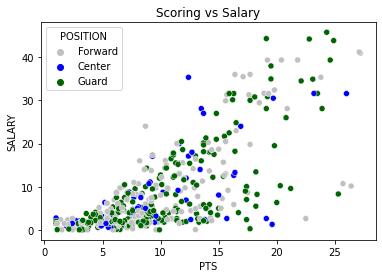

In [52]:
### Complete in this cell:  Relationship between scoring and salary (in millions of dollars)

scoring = working_df["PTS"]
salary = (working_df["SALARY"]/1000000)

sns.scatterplot(data = working_df, x=scoring, y=salary, hue="POSITION", palette=['silver','blue','darkgreen'])

plt.title("Scoring vs Salary")

3- Now plot assists-vs-salary and rebounding-vs-salary

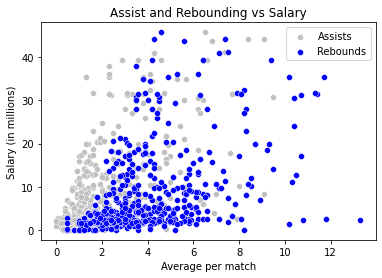

In [53]:
### Complete in this cell: plot assist-vs-salary, rebounding-vs-salary

assist = working_df["AST"]
rebounding = working_df["REB"]
salary = (working_df["SALARY"]/1000000)

sns.scatterplot(data=working_df, x = assist, y = salary, color = 'silver', cmap = 'Spectral')
sns.scatterplot(data=working_df, x = rebounding, y = salary, color= 'blue', cmap = 'Spectral')

plt.title('Assist and Rebounding vs Salary')
plt.xlabel('Average per match')
plt.ylabel('Salary (in millions)')
plt.legend(["Assists", "Rebounds"])

4- When NBA players enter the league, they have low value salaries during what is called their "rookie contract". This means that it doesn't matter how well the player performs, they can't have large salaries. This can distort our understanding of how much teams value each skill, as a player could score 50 points a game and still earn just a couple of millions. So, lets now plot points, assists and rebounding vs salary, but only for players that have more than 4 years of experience (the typical length of a rookie contract)

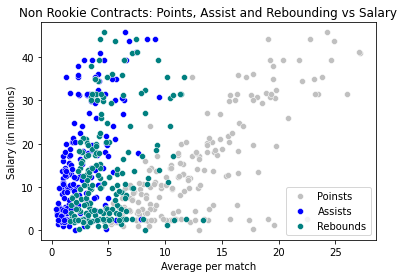

In [54]:
### Complete in this cell: non rookie contracts

Experienced = working_df[working_df["SEASON_EXP"] > 4]

points = Experienced["PTS"]
assist = Experienced["AST"]
rebounding = Experienced["REB"]
salary = (Experienced["SALARY"]/1000000)

sns.scatterplot(data=Experienced, x = points, y = salary, color= 'silver', cmap = 'Spectral')
sns.scatterplot(data=Experienced, x = assist, y = salary, color = 'blue', cmap = 'Spectral')
sns.scatterplot(data=Experienced, x = rebounding, y = salary, color= 'teal', cmap = 'Spectral')

plt.title('Non Rookie Contracts: Points, Assist and Rebounding vs Salary')
plt.xlabel('Average per match')
plt.ylabel('Salary (in millions)')
plt.legend(["Poinsts","Assists", "Rebounds"])


5- Plot the scoring average grouped by position, we want to be able to see median, quartiles, etc 

POSITION
Center     8.40
Forward    8.50
Guard      9.65
Name: PTS, dtype: float64


Text(0.5, 1.0, 'Scoring average grouped by position')

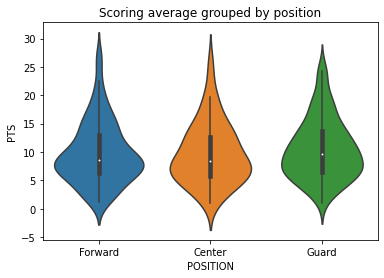

In [55]:
### Complete in this cell: Scoring average grouped by position

scoring_average = working_df.groupby("POSITION")
scoring_average = scoring_average["PTS"]
print(scoring_average.median())


sns.violinplot(x = working_df["POSITION"], y = working_df["PTS"], vert = True)
plt.title("Scoring average grouped by position")

6- Plot the Height distribution of all players

Text(0, 0.5, 'Number of Players')

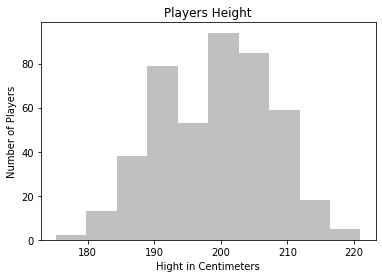

In [56]:
### Complete in this cell: height distribution

height_distribution = working_df["HEIGHT"]

plt.hist(data = working_df, x = "HEIGHT", color = "silver")

plt.title('Players Height')
plt.xlabel("Hight in Centimeters")
plt.ylabel("Number of Players")

OPTIONAL: Can you find a way to draw a world map and show how many active players per country the NBA has? [Example](https://i.redd.it/8qymui9fnin71.jpg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

     |████████████████████████████████| 862 kB 5.4 MB/s 
     |████████████████████████████████| 219 kB 47.4 MB/s 
     |████████████████████████████████| 6.3 MB 44.7 MB/s 
     |████████████████████████████████| 30.5 MB 1.2 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=d9a9b4736d454eee0bc10126153ac767d051703da5c4e0f0830e4423f8279a99
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


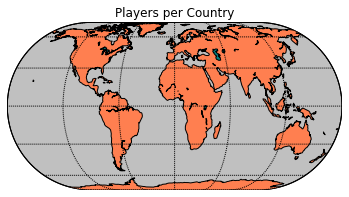

In [57]:
working_df_map = working_df[["PLAYER_NAME","COUNTRY"]]
working_df_map["PPC"] = working_df_map.groupby("COUNTRY")["PLAYER_NAME"].count()

working_df_map["COUNTRY"]=working_df_map["COUNTRY"].str.replace("United States of America","USA",regex=True)
working_df_map["COUNTRY"]=working_df_map["COUNTRY"].str.replace("Dominican Rep.","Dominican Republic",regex=True)
working_df_map["COUNTRY"]=working_df_map["COUNTRY"].str.replace("Dem. Rep. Congo","DRC",regex=True)
working_df_map["COUNTRY"]=working_df_map["COUNTRY"].str.replace("Congo","Republic of the Congo",regex=True)
working_df_map["COUNTRY"]=working_df_map["COUNTRY"].str.replace("Bosnia and Herz.","Bosnia and Herzegovina",regex=True)
working_df_map["COUNTRY"]=working_df_map["COUNTRY"].str.replace("S. Sudan","South Sudan",regex=True)
working_df_map["COUNTRY"]=working_df_map["COUNTRY"].str.replace("Czechia","Czech Republic",regex=True)

!pip install basemap #-1.0.8-cp34-none-win_amd64.whl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

m = Basemap(projection='eck4',lon_0=0,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='teal')

m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.drawmapboundary(fill_color='silver')
plt.plot(working_df_map["PPC"])
plt.title("Players per Country")
plt.show()
